## Visualizaciones de datos en Python II

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

Veamos algunos conceptos teóricos:

### Media
----

Dados los n números ${\{x_{1},x_{2},\ldots ,x_{n}\}}$ la media aritmética se define como: 

\begin{equation}
    \bar {x} = {\frac {1}{n}} \sum _{i=1}^{n}x_{i} ={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}
\end{equation}


Por ejemplo, para la muestra 8, 5 y -1, su media es:

\begin{equation}
    \bar {x} ={\frac {8+5+(-1)}{3} = 4}
\end{equation}


Veamos un ejemplo en el código:

In [2]:
ejemplo = np.array([8, 5, -1])
ejemplo = pd.DataFrame(ejemplo)
ejemplo.mean()

0    4.0
dtype: float64

### Mediana
----

La mediana es el valor del "medio" de una lista  **ordenada** de datos (o el valor que separa la primera mitad y la segunda mitad de una distribución).

Para una lista ordenada la mediana es calculada de diferente manera dependiendo de la cantidad de elementos de la misma:

Veamos un ejemplo en el código:

In [3]:
ejemplo = np.array([8, 5, -1])
ejemplo = pd.DataFrame(ejemplo)
ejemplo.median()

0    5.0
dtype: float64

### Moda
-----

La moda es el **valor que aparece con mayor frecuencia** o más veces en la distribución. 

Por ejemplo, la moda de `[0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5]` es 2.

La moda no es necesariamente única. Puede ocurrir que haya dos valores diferentes que sean los más frecuentes. 

Por ejemplo, para [10, 13, 13, 20, 20], tanto 13 como 20 son la moda.

### Diagrama de caja (box plot)
-----

Permite representar gráficamente una serie de datos estadísticos de una variable.

El diagrama de caja muestra a simple vista la media, mediana y los cuartiles, y también los valores atípicos (outliers).

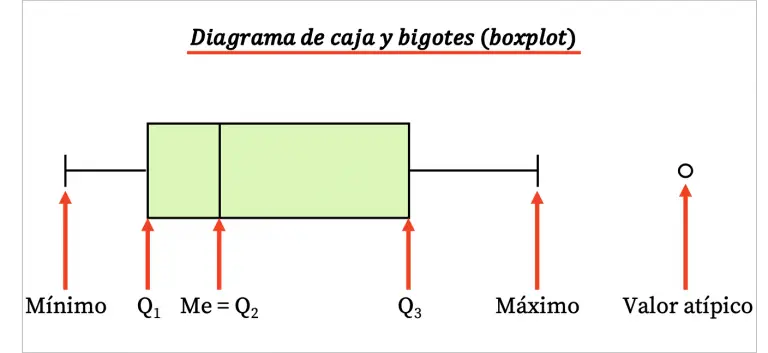

## Asimetría

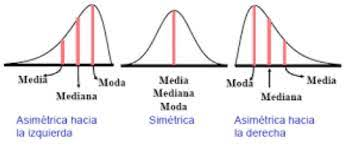

</tr>
    <td align="center"><h4>Media < Mediana < Moda</h4></td>    
    <td align="center"><h4>Media = Mediana = Moda</h4></td>            
    <td align="center"><h4>Moda < Mediana < Media</h4></td>            
    </tr>    
</table>

#### Se puede transformar datasets asimetricos en simetricos ?

#### La respuesta es que aveces si y una de las formas mas comunes de transformacion es usando 'La escalera de Tuckey':
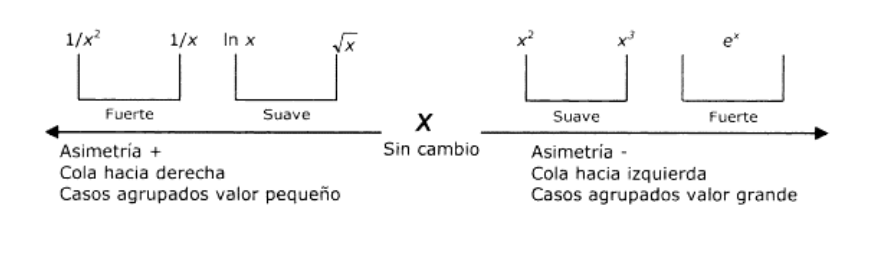

## Ejemplo:

In [4]:
df_vacunas = pd.read_csv("...\\Covid_19_Vacunas.csv", sep = ",") 
print(df_vacunas.shape)
df_vacunas.head(2)

(243, 8)


,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad,dosis_adicional_cantidad,dosis_refuerzo_cantidad
0,6,Buenos Aires,AstraZeneca ChAdOx1 S recombinante,0,3648449,4022439,832867,1121179
1,6,Buenos Aires,COVISHIELD ChAdOx1nCoV COVID 19,0,251406,382,0,0


In [5]:
df_vacunas.primera_dosis_cantidad.sum()

41137534

In [6]:
df_vacunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   jurisdiccion_codigo_indec  243 non-null    int64 
 1   jurisdiccion_nombre        243 non-null    object
 2   vacuna_nombre              243 non-null    object
 3   dosis_unica_cantidad       243 non-null    int64 
 4   primera_dosis_cantidad     243 non-null    int64 
 5   segunda_dosis_cantidad     243 non-null    int64 
 6   dosis_adicional_cantidad   243 non-null    int64 
 7   dosis_refuerzo_cantidad    243 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.3+ KB


In [7]:
df_vacunas.describe()

,jurisdiccion_codigo_indec,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad,dosis_adicional_cantidad,dosis_refuerzo_cantidad
count,243.000000,243.000000,2.430000e+02,2.430000e+02,243.000000,2.430000e+02
mean,48.041152,1325.485597,1.692903e+05,1.550936e+05,13047.703704,1.327971e+05
std,27.601323,7083.362762,5.578790e+05,4.942206e+05,61809.039789,4.986726e+05
min,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,26.000000,0.000000,3.615000e+02,2.310000e+02,0.000000,2.357500e+03
50%,46.000000,0.000000,1.688000e+04,9.690000e+03,155.000000,1.518700e+04
75%,70.000000,0.000000,1.374255e+05,1.298920e+05,3766.500000,8.226850e+04
max,94.000000,90305.000000,5.954695e+06,5.265952e+06,832867.000000,5.389128e+06


In [8]:
df_vacunas.vacuna_nombre.describe()

count                                    243
unique                                    11
top       AstraZeneca ChAdOx1 S recombinante
freq                                      24
Name: vacuna_nombre, dtype: object

In [9]:
df_vacunas_ge = df_vacunas.vacuna_nombre.value_counts()
df_vacunas_ge.head(3)

AstraZeneca ChAdOx1 S recombinante    24
COVISHIELD ChAdOx1nCoV COVID 19       24
Cansino Ad5 nCoV                      24
Name: vacuna_nombre, dtype: int64

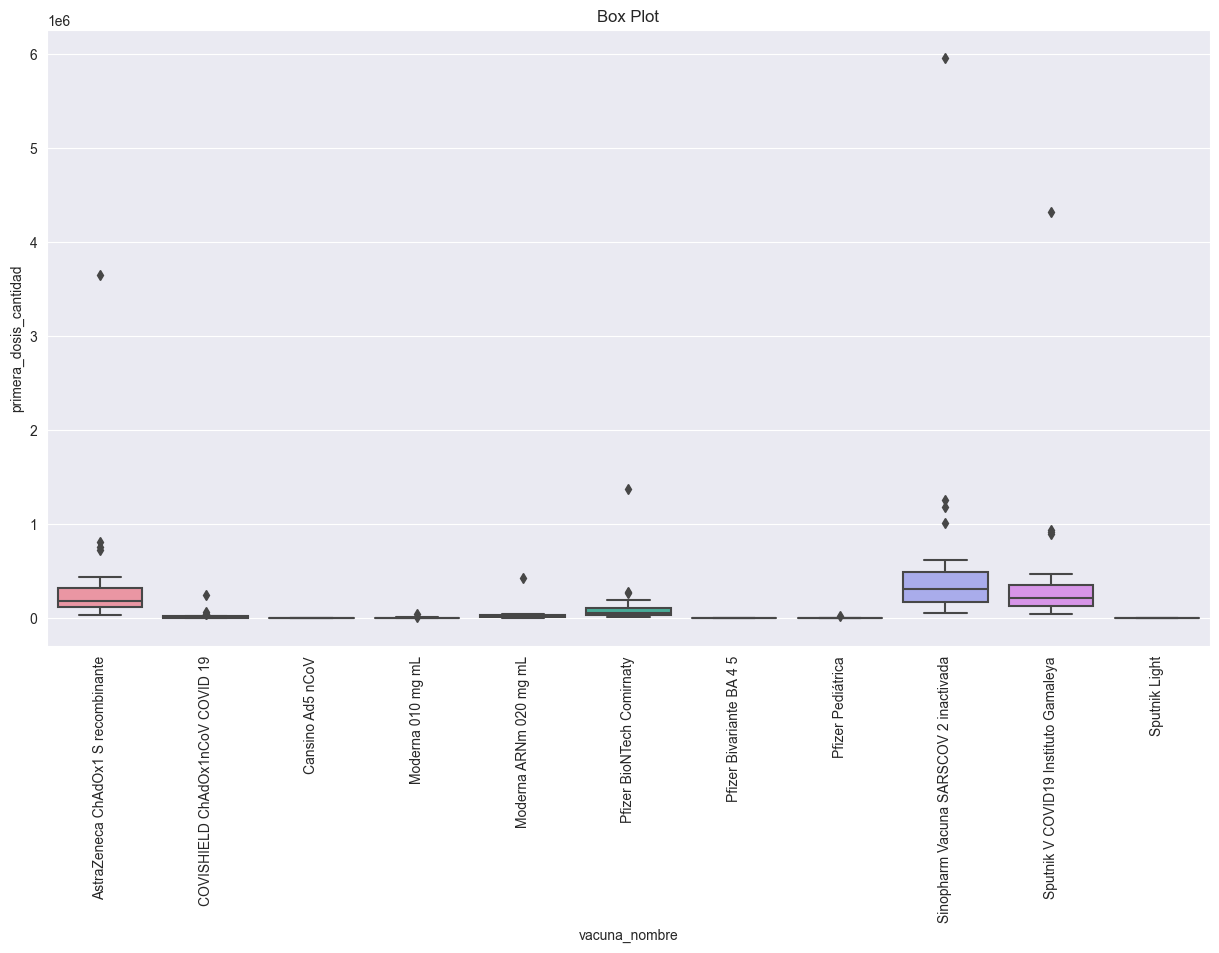

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_vacunas, x="vacuna_nombre", y="primera_dosis_cantidad")

plt.xlabel("vacuna_nombre"); plt.ylabel("primera_dosis_cantidad");plt.title("Box Plot")
plt.tick_params(axis='x', rotation=90)
plt.show()

In [11]:
df_vacunas[('jurisdiccion_nombre')].unique()

array(['Buenos Aires', 'CABA', 'Catamarca', 'Chaco', 'Chubut',
       'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'],
      dtype=object)

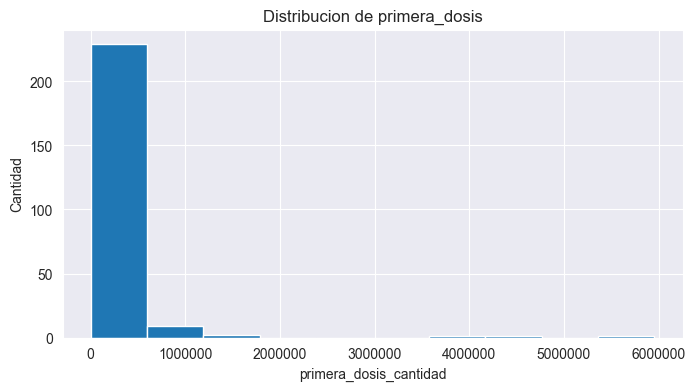

In [12]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist (df_vacunas['primera_dosis_cantidad'])
ax.set_xlabel ('primera_dosis_cantidad')
plt.ticklabel_format(style='plain', axis='x')
ax.set_ylabel ('Cantidad')
ax.set_title ('Distribucion de primera_dosis')
plt.show()

In [13]:
df_vacunas_BSAS = df_vacunas[(df_vacunas.jurisdiccion_nombre == 'Buenos Aires')]
df_vacunas_BSAS

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,dosis_unica_cantidad,primera_dosis_cantidad,segunda_dosis_cantidad,dosis_adicional_cantidad,dosis_refuerzo_cantidad
0,6,Buenos Aires,AstraZeneca ChAdOx1 S recombinante,0,3648449,4022439,832867,1121179
1,6,Buenos Aires,COVISHIELD ChAdOx1nCoV COVID 19,0,251406,382,0,0
2,6,Buenos Aires,Cansino Ad5 nCoV,90305,0,7732,1530,110362
3,6,Buenos Aires,Moderna 010 mg mL,0,43797,20362,0,121710
4,6,Buenos Aires,Moderna ARNm 020 mg mL,0,426049,1262481,3185,4503851
5,6,Buenos Aires,Pfizer BioNTech Comirnaty,0,1373096,1450233,77612,5389128
6,6,Buenos Aires,Pfizer Bivariante BA 4 5,0,0,0,0,35253
7,6,Buenos Aires,Pfizer Pediátrica,0,20443,10301,139190,2
8,6,Buenos Aires,Sinopharm Vacuna SARSCOV 2 inactivada,0,5954695,5265952,1662,11058
9,6,Buenos Aires,Sputnik V COVID19 Instituto Gamaleya,0,4315702,2693068,6256,856354


In [18]:
df_vacunas.groupby('vacuna_nombre')['dosis_refuerzo_cantidad'].sum()

vacuna_nombre
AstraZeneca ChAdOx1 S recombinante        4308917
COVISHIELD ChAdOx1nCoV COVID 19                 0
Cansino Ad5 nCoV                           624450
Moderna 010 mg mL                          426815
Moderna ARNm 020 mg mL                   12567061
Pfizer BioNTech Comirnaty                11733355
Pfizer Bivariante BA 4 5                   174840
Pfizer Pediátrica                          372956
Sinopharm Vacuna SARSCOV 2 inactivada       55703
Sputnik Light                                  18
Sputnik V COVID19 Instituto Gamaleya      2005585
Name: dosis_refuerzo_cantidad, dtype: int64

In [19]:
df_vacunas.groupby('jurisdiccion_nombre')['primera_dosis_cantidad'].mean()

jurisdiccion_nombre
Buenos Aires           1.603364e+06
CABA                   2.955729e+05
Catamarca              4.059290e+04
Chaco                  1.011873e+05
Chubut                 5.104860e+04
Corrientes             1.032875e+05
Córdoba                3.391975e+05
Entre Ríos             1.244075e+05
Formosa                5.822060e+04
Jujuy                  7.037590e+04
La Pampa               3.045300e+04
La Rioja               3.311209e+04
Mendoza                1.755659e+05
Misiones               9.625900e+04
Neuquén                6.321390e+04
Río Negro              6.865030e+04
Salta                  1.089976e+05
San Juan               7.091900e+04
San Luis               4.561540e+04
Santa Cruz             3.040180e+04
Santa Fe               3.236260e+05
Santiago del Estero    9.647330e+04
Tierra del Fuego       1.587430e+04
Tucumán                1.500811e+05
Name: primera_dosis_cantidad, dtype: float64

In [20]:
df_grouped = df_vacunas.groupby('jurisdiccion_nombre')

In [22]:
(df_grouped['primera_dosis_cantidad'].sum() / df_vacunas['primera_dosis_cantidad'].sum())*100

jurisdiccion_nombre
Buenos Aires           38.975688
CABA                    7.184993
Catamarca               0.986761
Chaco                   2.459732
Chubut                  1.240925
Corrientes              2.510785
Córdoba                 8.245450
Entre Ríos              3.024185
Formosa                 1.415267
Jujuy                   1.710747
La Pampa                0.814300
La Rioja                0.885403
Mendoza                 4.267779
Misiones                2.339931
Neuquén                 1.536648
Río Negro               1.668800
Salta                   2.914550
San Juan                1.723949
San Luis                1.108851
Santa Cruz              0.739028
Santa Fe                7.866928
Santiago del Estero     2.345141
Tierra del Fuego        0.385884
Tucumán                 3.648277
Name: primera_dosis_cantidad, dtype: float64

Una **serie de tiempo** es un conjunto de observaciones tomadas en *intervalos regulares* (lags), **ordenadas** por el momento en que se produjeron.

**Time series analysis** (*análisis de series de tiempo*) comprende métodos para *proyectar la evolución*, obtener *estadísticas y otras características* de una variable a lo largo del tiempo.

**Time series forecasting** (*Pronóstico de series de tiempo*) es el uso de los modelos para predecir futuros valores.

La serie de tiempo se proyecta como una *variable* (eje y) en *función del tiempo* (eje x). 

### Componentes de una serie de tiempo
---

Podemos encontrar en una serie de tiempo **cuatro componentes**:

- **Tendencia** (Trend): es el componente *permanente*, el efecto persistente en el tiempo.

- **Estacionalidad** (Seasonality): es un patrón estacional que se *repite con regularidad*. 

- **Componente aleatoria** (Residual - Remainder): son shocks que no presentan un efecto duradero. Se los define también como ruido o movimientos random.

- **Ciclos** (Cycle): otro tipo de dinámica no capturada por la tendencia o estacionalidad.